<a href="https://colab.research.google.com/github/Steven-Macas/Automobile-Red-Neuronal/blob/main/red_neuronal_PIA_automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de datos

## Descargar dataset

Fuente: https://archive.ics.uci.edu/ml/datasets/automobile

Datos: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

Atributos: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names

In [1]:
!wget -qP datasets/ https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

!wget -qP datasets/ https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names

## Asignar dataset

El dataset contiene información sobre 205 automóviles y sus precios, aunque
no incluye los nombres de las columnas; esta información se encuentra en un archivo adicional. Concretamente, el dataset contiene:

i) información de un automóvil en términos de diversas características, 

ii) su nivel de riesgo en relación con el seguro, y

iii) el pago medio relativo de los siniestros ocurridos por año de seguro. 

Finalmente, cada fila del dataset contiene información sobre el precio por el que se vendió dicho vehículo. Esta sera la variable objetivo.

In [2]:
import pandas as pd
import numpy as np

In [3]:
feature_names = ['Symboling', 'normalized-losses', 'make', 'fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

# los valores desconocidos en el dataset están marcados con una interrogación
df = pd.read_csv('datasets/imports-85.data', names = feature_names, na_values = '?')


In [4]:
print(len(df))

205


In [5]:
df.columns.values

array(['Symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'], dtype=object)

In [6]:
df.head()

,Symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# Preparación de los datos

Una vez importado el dataset, empezaremos identificando y corrigiendo
aquellos valores que falten en las filas. Para ello, primero identificaremos qué propiedades son las que presentan dichos valores utilizando el método isnull() del dataframe para filtrar por aquellas columnas que tengan al menos una celda sin valor.


In [7]:
def print_cols_with_missing_values(df):
  cols_with_missing = df.isnull().sum()
  print(cols_with_missing[cols_with_missing > 0])

print_cols_with_missing_values(df)

normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64


In [8]:
unique_makes = df['Symboling'].unique()
print('Symboling: ',unique_makes)
unique_makes = df['aspiration'].unique()
print('aspiration: ',unique_makes)
unique_makes = df['normalized-losses'].unique()
print('normalized-losses: ',unique_makes)
unique_makes = df['make'].unique()
print('make: ',unique_makes)
unique_makes = df['bore'].unique()
print('bore: ',unique_makes)
unique_makes = df['horsepower'].unique()
print('horsepower: ',unique_makes)
unique_makes = df['stroke'].unique()
print('stroke: ',unique_makes)
unique_makes = df['horsepower'].unique()
print('horsepower: ',unique_makes)
unique_makes = df['num-of-doors'].unique()
print('num_doors: ',unique_makes)

Symboling:  [ 3  1  2  0 -1 -2]
aspiration:  ['std' 'turbo']
normalized-losses:  [ nan 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 145. 137. 101.
  78. 106.  85. 107. 104. 113. 150. 129. 115.  93. 142. 161. 153. 125.
 128. 122. 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.
  87.  77.  91. 134.  65. 197.  90.  94. 256.  95.]
make:  ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
bore:  [3.47 2.68 3.19 3.13 3.5  3.31 3.62 2.91 3.03 2.97 3.34 3.6  2.92 3.15
 3.43 3.63 3.54 3.08  nan 3.39 3.76 3.58 3.46 3.8  3.78 3.17 3.35 3.59
 2.99 3.33 3.7  3.61 3.94 3.74 2.54 3.05 3.27 3.24 3.01]
horsepower:  [111. 154. 102. 115. 110. 140. 160. 101. 121. 182.  48.  70.  68.  88.
 145.  58.  76.  60.  86. 100.  78.  90. 176. 262. 135.  84.  64. 120.
  72. 123. 155. 184. 175. 116.  69.  55.  97. 152. 200.  95. 142. 1

In [9]:
# a los atributos normalized-losses, bore, stroke, horsepower y peak-rpm
# se les deben sustituir los valores nan por la media de la columna
# calcula la media de las columnas con valores faltantes
mean_norm_losses = df['normalized-losses'].mean()
mean_bore = df['bore'].mean()
mean_stroke = df['stroke'].mean()
mean_horsepower = df['horsepower'].mean()
mean_peak_rpm = df['peak-rpm'].mean()

# reemplaza los valores NaN con la media de cada columna
df['normalized-losses'].fillna(mean_norm_losses, inplace=True)
df['bore'].fillna(mean_bore, inplace=True)
df['stroke'].fillna(mean_stroke, inplace=True)
df['horsepower'].fillna(mean_horsepower, inplace=True)
df['peak-rpm'].fillna(mean_peak_rpm, inplace=True)



In [10]:
# a los atributos normalized-losses, bore, stroke, horsepower y peak-rpm
# se les deben sustituir los valores nan por la media de la columna
# calcula la media de las columnas con valores faltantes

df['normalized-losses'].fillna(df['normalized-losses'].mean(), inplace=True)
df['bore'].fillna(df['bore'].mean(), inplace=True)
df['stroke'].fillna(df['stroke'].mean(), inplace=True)
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)
df['peak-rpm'].fillna(df['peak-rpm'].mean(), inplace=True)

In [11]:
def print_cols_with_missing_values(df):
  cols_with_missing = df.isnull().sum()
  print(cols_with_missing[cols_with_missing > 0])

print_cols_with_missing_values(df)

num-of-doors    2
price           4
dtype: int64


In [12]:
# al atributo num_doors se le debe sustituir los valores nan por la moda de la columna
most_common_num_of_doors = df['num-of-doors'].value_counts().idxmax()
df['num-of-doors'].fillna(most_common_num_of_doors, inplace=True)

In [13]:
# el atributo price también incluye algunos valores nulos, en este caso, y dado
# que se trata de la variable objetivo, no hay mucho que se pueda hacer,
# por lo que simplemente se eliminan las filas sin precio
df.dropna(subset=['price'], inplace=True)

In [14]:
# después de borrar filas es conveniente resetear el índice del dataframe
df.reset_index(drop = True, inplace = True)

In [15]:
print_cols_with_missing_values(df)

Series([], dtype: int64)


# Normalización de los datos

In [16]:
# hay que agrupar las propiedades categóricas y numéricas en dos variables
# distintas que nos permitan trabajar de manera más cómoda con los datos

numeric_feature_names = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

categorical_feature_names = ['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']

all_feature_names = numeric_feature_names + categorical_feature_names

target = 'price'

print(f'Propiedades numéricas: {numeric_feature_names} ({len(numeric_feature_names)})')
print(f'Propiedades categóricas: {categorical_feature_names} ({len(categorical_feature_names)})')
print(f'Propiedad objetivo: {target}')

Propiedades numéricas: ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'] (15)
Propiedades categóricas: ['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'] (11)
Propiedad objetivo: price


<ipython-input-17-490db72d8d39>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[numeric_feature_names].hist(ax = plt.figure(figsize = (15, 15)).gca())


array([[<AxesSubplot:title={'center':'normalized-losses'}>,
        <AxesSubplot:title={'center':'wheel-base'}>,
        <AxesSubplot:title={'center':'length'}>,
        <AxesSubplot:title={'center':'width'}>],
       [<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'curb-weight'}>,
        <AxesSubplot:title={'center':'engine-size'}>,
        <AxesSubplot:title={'center':'bore'}>],
       [<AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compression-ratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'peak-rpm'}>],
       [<AxesSubplot:title={'center':'city-mpg'}>,
        <AxesSubplot:title={'center':'highway-mpg'}>,
        <AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

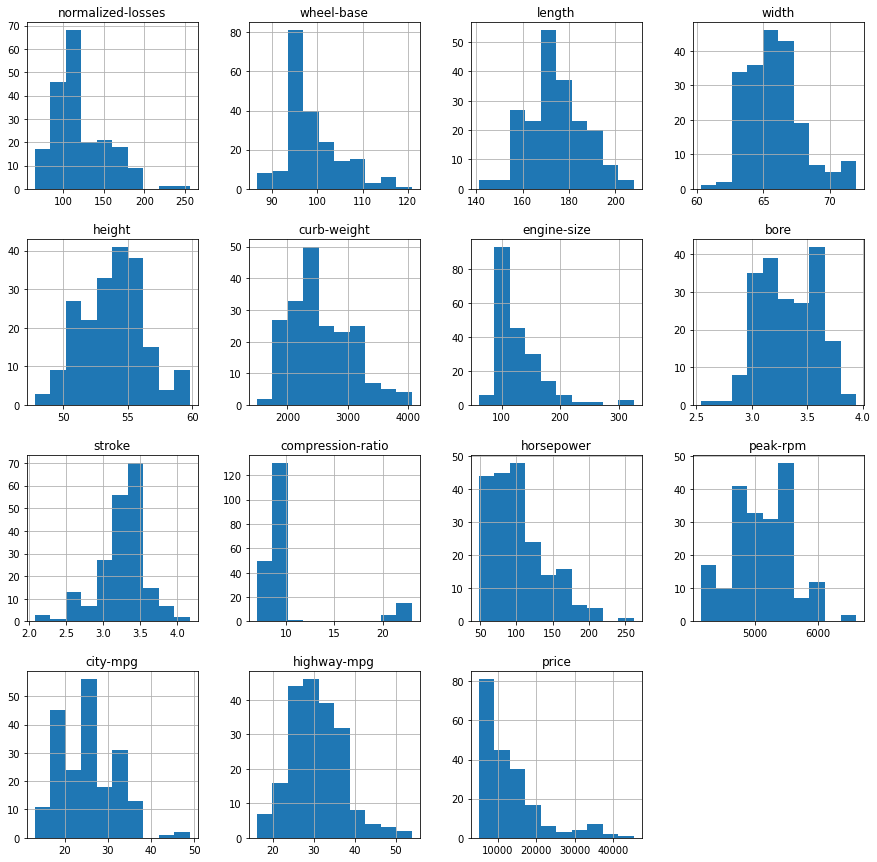

In [17]:
# se comienza el análisis examinando los histogramas de las
# propiedades numéricas para tener una visión general de las distribuciones
import matplotlib.pyplot as plt
df[numeric_feature_names].hist(ax = plt.figure(figsize = (15, 15)).gca())

De estos histogramas podemos identificar varias desviaciones positivas (p. ej.,
normalized-losses o engine-size) ocasionadas por algunos valores atípicos. Para
mejorar las distribuciones, se procede a aplicar algunas transformaciones a
aquellas propiedades que presentan valores atípicos extremos.

En primer lugar, se tendrá qué identificar cuáles son esos valores atípicos extremos. Para ello, podemos utilizar los diagramas de cajas (boxplots) para visualizarlos y confirmar que existen. Para dibujarlos, podemos hacerlo fácilmente utilizando la biblioteca seaborn.

In [18]:
import seaborn as sns

# mediante esta función de pueden visualizar los 'outliers'
def draw_hist_boxplot(df, feature_name):
  # se dibuja el diagrama de cajas
  sns.boxplot(x = feature_name, data = df)
  # se dibujan sobre el diagrama todos los puntos de datos que tiene la propiedad
  sns.stripplot(x = feature_name, data = df, color = "#474646")

# mediante esta función se reemplazan todos los outliers
# cualquier valor por encima o por debajo de los
# límites superior o inferior es sustituido por la mediana
def replace_outliers_with_median(df, feature_name):
  Q1 = df[feature_name].quantile(0.25)
  median = df[feature_name].quantile(0.5)
  Q3 = df[feature_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_whisker = Q1 - 1.5 * IQR
  upper_whisker = Q3 + 1.5 * IQR
  df[feature_name] = np.where((df[feature_name] < lower_whisker) | 
                              (df[feature_name] > upper_whisker), 
                                median, 
                                df[feature_name])

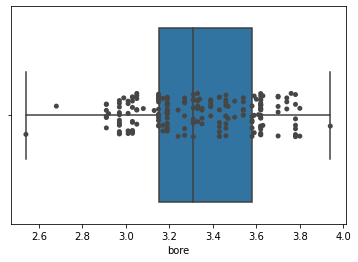

In [19]:
# se dibuja el diagrama y los puntos, se observa que no hay outliers
draw_hist_boxplot(df, 'bore')

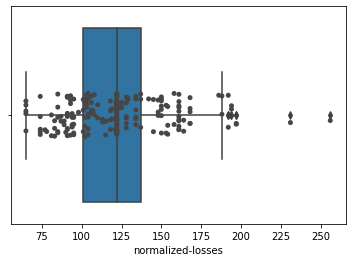

In [20]:
# se dibuja
draw_hist_boxplot(df, 'normalized-losses')

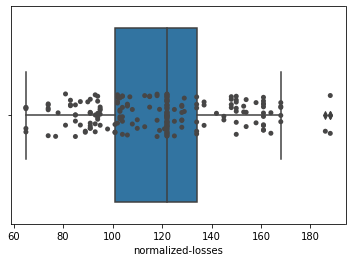

In [21]:
# se reemplazan los outliers y se vuelve a dibujar
replace_outliers_with_median(df, 'normalized-losses')
draw_hist_boxplot(df, 'normalized-losses')

In [22]:
# se puede ejecutar el método skew() sobre la serie de un dataframe para
# cuantificar la desviación de la distribución y su signo
# si lo ejecutamos antes y después de corregir los valores atípicos,
# podremos ver cómo el valor de desviación se va reduciendo ligeramente
print(df['normalized-losses'].skew())

0.2551782989144891


In [23]:
# dibujar atributo stroke
print(df['stroke'].skew())

-0.7003960287260405


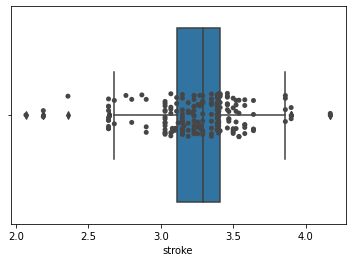

In [24]:
draw_hist_boxplot(df, 'stroke')

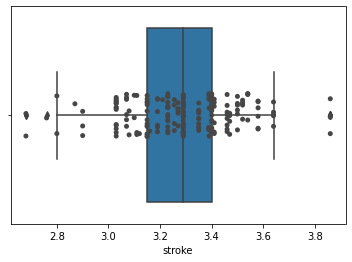

In [25]:
# reemplazar outliers de stroke y volver a dibujar
replace_outliers_with_median(df, 'stroke')
draw_hist_boxplot(df, 'stroke')

In [26]:
# repetir para los todos los atributos numéricos:
# compression-ratio, engine-size, peak-rpm, horsepower, etc.
# lista de atributos numéricos
numeric_features = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# reemplazar outliers y dibujar boxplot para cada atributo numérico
for feature in numeric_features:
    replace_outliers_with_median(df, feature)
    print(feature)

normalized-losses
wheel-base
length
width
height
curb-weight
engine-size
bore
stroke
compression-ratio
horsepower
peak-rpm
city-mpg
highway-mpg
price


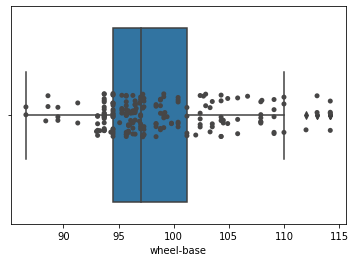

In [27]:
#Una vez reemplazados los outliers, solo tenemos que cambiar el nombre para que se nos dibuje el que queramos
draw_hist_boxplot(df, 'wheel-base')

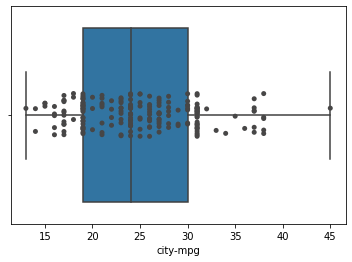

In [28]:
# atributo city-mpg
draw_hist_boxplot(df, 'city-mpg')

In [29]:
# en la propiedad city-mpg podremos ver cómo sólo hay algunos pocos valores atípicos
# como son pocos, simplemente los eliminaremos del conjunto de datos

#Primero calculamos el rango intercuartil, la diferencia entre el tercer cuartil y el primer cuartil.
#Luego multiplicamos el intercuartil por 1.5 para obtener el límite superior

# Paso 1: obtener información estadística de la columna "city-mpg"
city_mpg_stats = df['city-mpg'].describe()

# Paso 2: calcular el rango intercuartílico (IQR) para la columna "city-mpg"
q1 = city_mpg_stats['25%']
q3 = city_mpg_stats['75%']
iqr = q3 - q1

# Paso 3: calcular el límite superior del rango intercuartílico (upper whisker)
upper_whisker = q3 + 1.5*iqr

# Paso 4: encontrar el límite máximo que no es un outlier
VALOR_OUTLIER = df['city-mpg'].loc[df['city-mpg'] <= upper_whisker].max()

print("El límite máximo que no es un outlier para la columna 'city-mpg' es:", VALOR_OUTLIER)


El límite máximo que no es un outlier para la columna 'city-mpg' es: 45.0


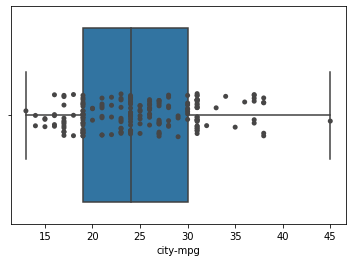

In [30]:
df.drop(df.loc[df['city-mpg'] > VALOR_OUTLIER].index, inplace = True)
draw_hist_boxplot(df, 'city-mpg')

<ipython-input-31-9d0ec4ee150d>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[numeric_feature_names].hist(ax = plt.figure(figsize = (15, 15)).gca())


array([[<AxesSubplot:title={'center':'normalized-losses'}>,
        <AxesSubplot:title={'center':'wheel-base'}>,
        <AxesSubplot:title={'center':'length'}>,
        <AxesSubplot:title={'center':'width'}>],
       [<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'curb-weight'}>,
        <AxesSubplot:title={'center':'engine-size'}>,
        <AxesSubplot:title={'center':'bore'}>],
       [<AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compression-ratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'peak-rpm'}>],
       [<AxesSubplot:title={'center':'city-mpg'}>,
        <AxesSubplot:title={'center':'highway-mpg'}>,
        <AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

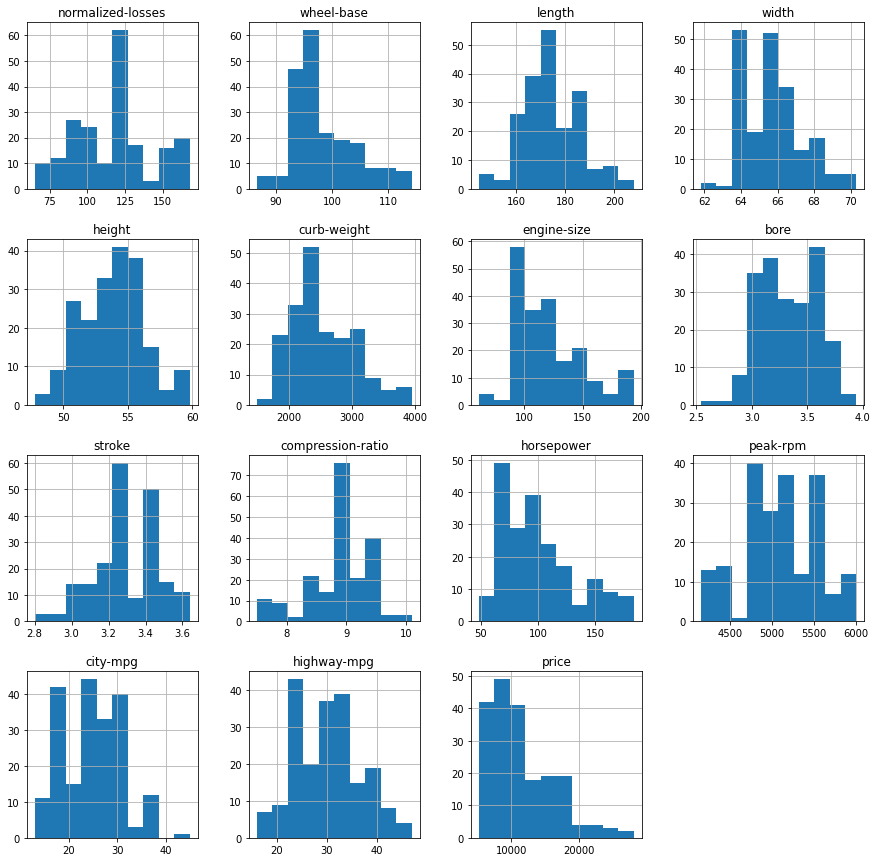

In [31]:
# una vez que hayamos finalizado, podemos volver a visualizar los histogramas
# para ver que aspecto tienen las nuevas distribuciones
df[numeric_feature_names].hist(ax = plt.figure(figsize = (15, 15)).gca())

En las gráficas puede observarse como las desviaciones se han reducido ligeramente y ya no existen valores atípicos extremos. Para los valores atípicos que nos queden, podemos aplicar la técnica de normalizado mediante escalado. Para ello, podemos utilizar la clase StandardScaler del módulo sklearn.preprocessing y visualizar de nuevo los histogramas para revisar las nuevas distribuciones

<ipython-input-32-d1a2407358da>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[numeric_feature_names].hist(ax = plt.figure(figsize = (15, 15)).gca())


array([[<AxesSubplot:title={'center':'normalized-losses'}>,
        <AxesSubplot:title={'center':'wheel-base'}>,
        <AxesSubplot:title={'center':'length'}>,
        <AxesSubplot:title={'center':'width'}>],
       [<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'curb-weight'}>,
        <AxesSubplot:title={'center':'engine-size'}>,
        <AxesSubplot:title={'center':'bore'}>],
       [<AxesSubplot:title={'center':'stroke'}>,
        <AxesSubplot:title={'center':'compression-ratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'peak-rpm'}>],
       [<AxesSubplot:title={'center':'city-mpg'}>,
        <AxesSubplot:title={'center':'highway-mpg'}>,
        <AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

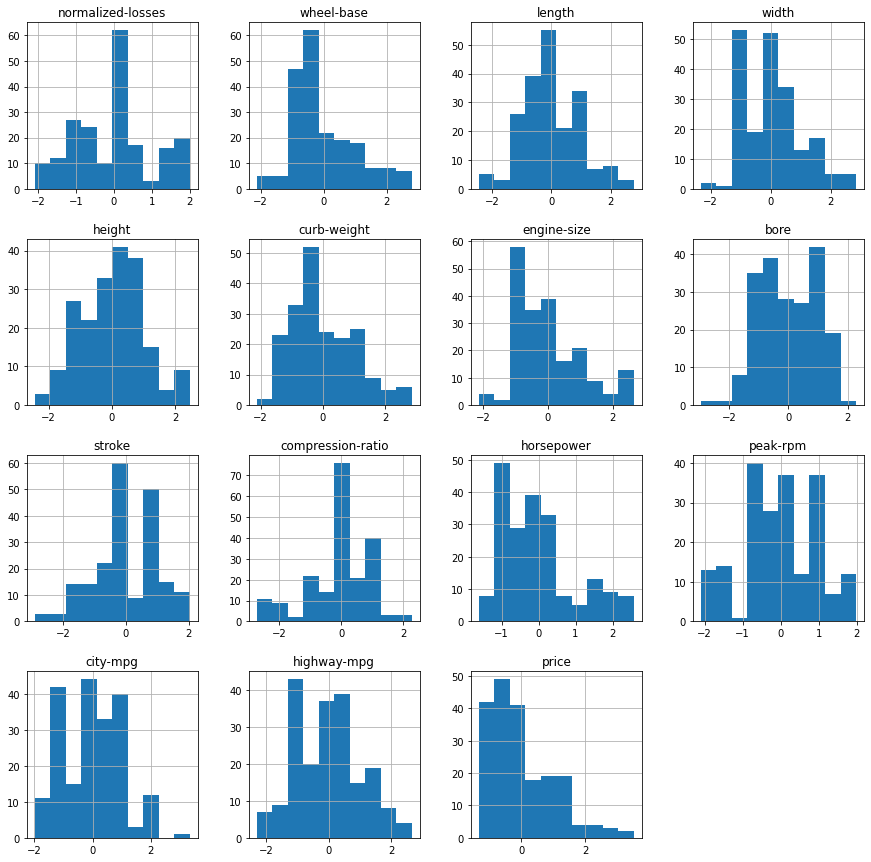

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_feature_names] = scaler.fit_transform(df[numeric_feature_names])

df[numeric_feature_names].hist(ax = plt.figure(figsize = (15, 15)).gca())

# Importancia de las propiedades y división del conjunto de datos

Vamos a analizar ahora el impacto de las propiedades sobre la variable objetivo. Para ello, vamos a empezar por las propiedades numéricas. Podemos realizar este análisis inicial mediante un mapa de calor que muestre las correlaciones que existen entre todas las variables, utilizando el método heatmap() del módulo seaborn e indicando que utilice la correlación de Pearson para ello.

<AxesSubplot:>

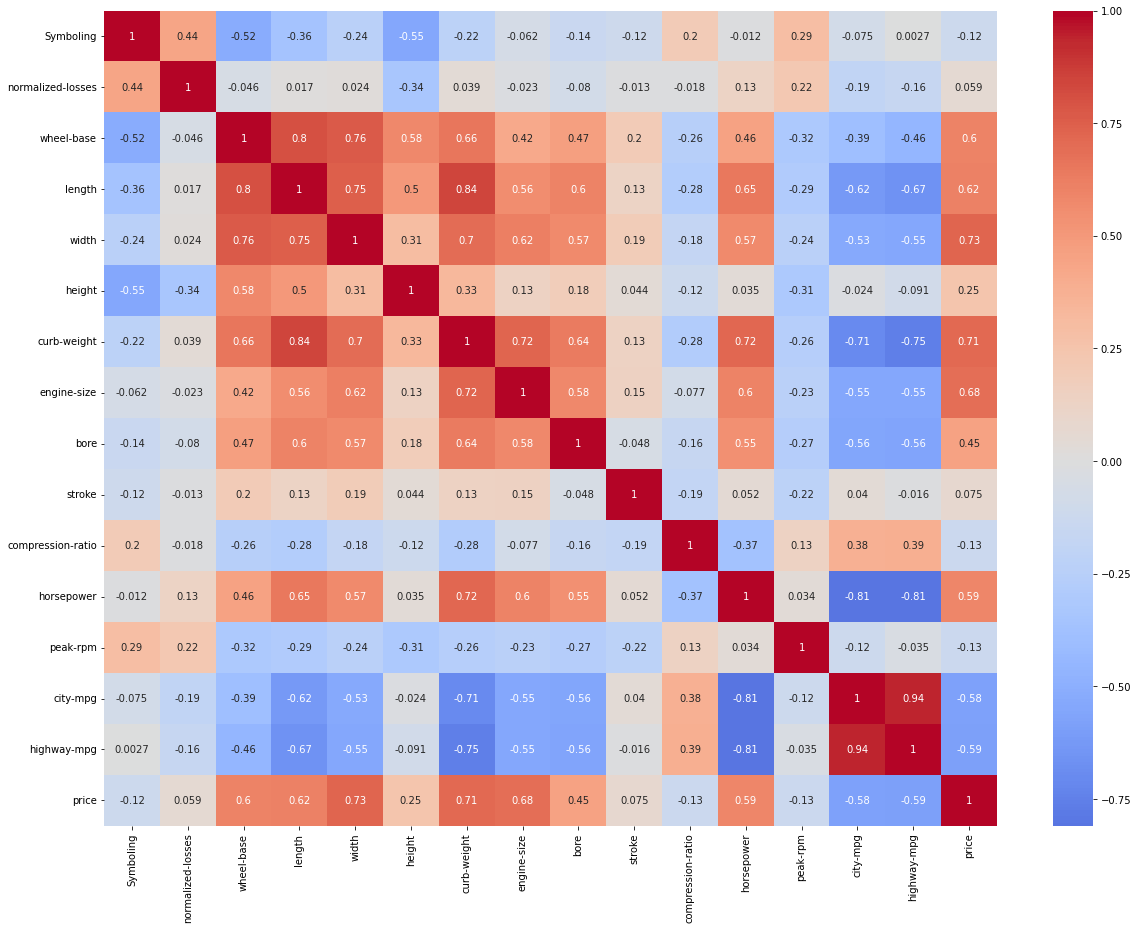

In [33]:
import seaborn as sns

plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), cmap='coolwarm', center=0, annot=True)

In [34]:
df.head()

,Symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0.172858,alfa-romero,gas,std,two,convertible,rwd,front,-1.767358,...,0.353915,mpfi,0.520966,-0.021165,0.159223,0.327701,-0.227263,-0.658389,-0.536437,0.432507
1,3,0.172858,alfa-romero,gas,std,two,convertible,rwd,front,-1.767358,...,0.353915,mpfi,0.520966,-0.021165,0.159223,0.327701,-0.227263,-0.658389,-0.536437,1.058565
2,1,0.172858,alfa-romero,gas,std,two,hatchback,rwd,front,-0.713342,...,1.145525,mpfi,-2.433363,1.039881,0.159223,1.654630,-0.227263,-0.992571,-0.696413,1.058565
3,2,1.844415,audi,gas,std,four,sedan,fwd,front,0.233485,...,-0.401712,mpfi,-0.526138,0.627252,2.089484,0.049971,0.876038,-0.157116,-0.056509,0.527301
4,2,1.844415,audi,gas,std,four,sedan,4wd,front,0.162026,...,0.569809,mpfi,-0.526138,0.627252,-1.771039,0.451136,0.876038,-1.159662,-1.336317,1.256487


In [35]:
# podemos utilizar el análisis para eliminar algunas propiedades que no
# tengan ninguna correlación con la variable objetivo: symboling
df.drop('Symboling', axis=1, inplace=True)

Sobre las variables categóricas, se pueden visualizar sus diagramas de cajas
para analizar sus distribuciones en relación al precio.

<AxesSubplot:xlabel='body-style', ylabel='price'>

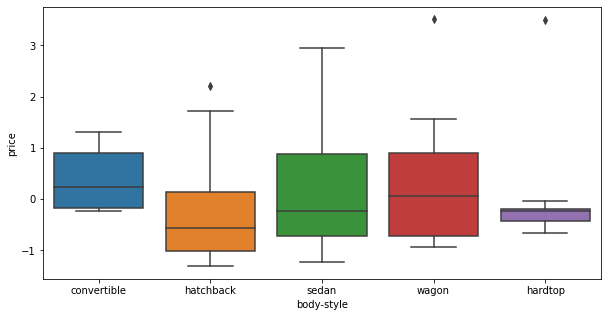

In [36]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'body-style', y = 'price', data = df)

<AxesSubplot:xlabel='aspiration', ylabel='price'>

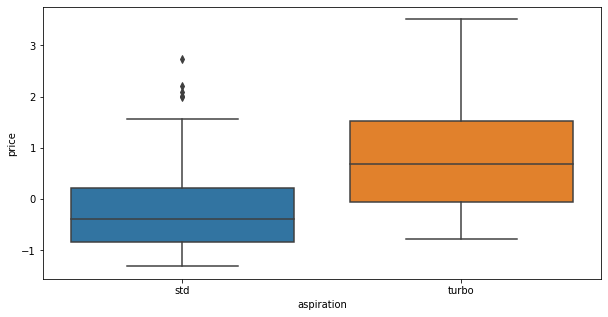

In [37]:
# aspiration
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'aspiration', y = 'price', data = df)

<AxesSubplot:xlabel='fuel-system', ylabel='price'>

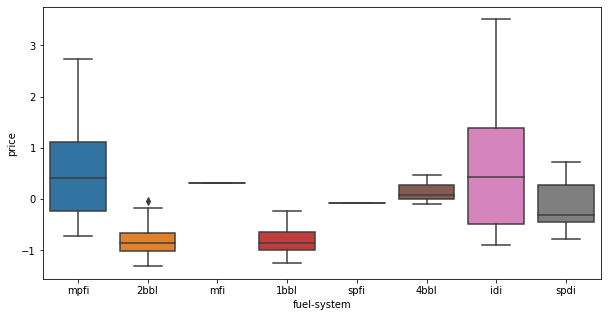

In [38]:
# fuel-system
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'fuel-system', y = 'price', data = df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

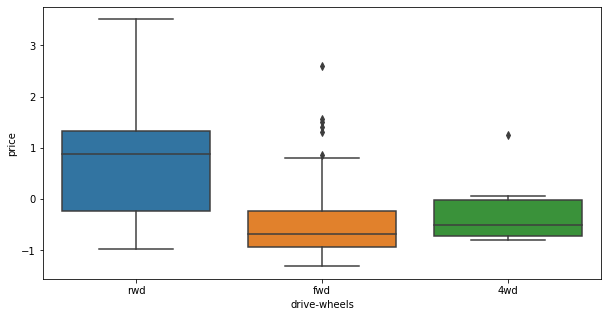

In [39]:
# drive-wheels
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'drive-wheels', y = 'price', data = df)

Una vez se hayan analizado las distintas propiedades, fijaremos las propiedades con las que entrenaremos el modelo y procederemos a la división del conjunto de datos en los conjuntos de entrenamiento, validación y pruebas.

In [40]:
categorical_feature_names = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']

numeric_feature_names = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

print(f'Propiedades numéricas: {numeric_feature_names} ({len(numeric_feature_names)})')
print(f'Propiedades categóricas: {categorical_feature_names} ({len(categorical_feature_names)})')

all_feature_names = numeric_feature_names + categorical_feature_names

Propiedades numéricas: ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'] (14)
Propiedades categóricas: ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'] (10)


In [41]:
df[numeric_feature_names].head(2)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,0.172858,-1.767358,-0.460824,-0.929196,-2.034081,0.017775,0.353915,0.520966,-0.021165,0.159223,0.327701,-0.227263,-0.658389,-0.536437
1,0.172858,-1.767358,-0.460824,-0.929196,-2.034081,0.017775,0.353915,0.520966,-0.021165,0.159223,0.327701,-0.227263,-0.658389,-0.536437


In [42]:
df[categorical_feature_names].head(2)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi


In [43]:
from sklearn.model_selection import train_test_split

X_train_full, X_test = train_test_split(df[all_feature_names + [target]], test_size = 0.2, random_state = 1)
X_train, X_val = train_test_split(X_train_full, test_size = 0.33, random_state = 1)

y_train = X_train[target].values
y_val = X_val[target].values
y_test = X_test[target].values

X_train.drop([target], axis = 1, inplace = True)
X_val.drop([target], axis = 1, inplace = True)
X_test.drop([target], axis = 1, inplace = True)

X_train.head(2)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,...,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
140,-0.623121,-0.266726,-0.195635,-0.137030,0.218425,-0.312550,-0.437695,1.081914,-0.021165,0.159223,...,subaru,gas,std,four,sedan,4wd,front,ohcf,four,2bbl
53,1.287229,-0.570425,-0.444250,0.045778,-1.706444,-0.322683,-1.805020,-0.003516,-0.224987,0.931327,...,mazda,gas,std,two,hatchback,rwd,front,rotor,two,4bbl


# Ingeniería de propiedades

Una vez realizada la división del conjunto de datos, procederemos a codificar el conjunto de propiedades en un vector de propiedades. Utilizaremos la clase DictVectorizer para realizar la codificación one-hot de las variables categóricas.

In [44]:
train_dict = X_train[all_feature_names].to_dict(orient = 'records')
dict(sorted(train_dict[0].items()))

{'aspiration': 'std',
 'body-style': 'sedan',
 'bore': 1.0819143990687177,
 'city-mpg': -0.15711553732480604,
 'compression-ratio': 0.15922257183458513,
 'curb-weight': -0.31254983893229027,
 'drive-wheels': '4wd',
 'engine-location': 'front',
 'engine-size': -0.4376946212884675,
 'engine-type': 'ohcf',
 'fuel-system': '2bbl',
 'fuel-type': 'gas',
 'height': 0.21842477472732055,
 'highway-mpg': -0.8563888317807471,
 'horsepower': -0.567205695600548,
 'length': -0.1956348042690088,
 'make': 'subaru',
 'normalized-losses': -0.6231211615199066,
 'num-of-cylinders': 'four',
 'num-of-doors': 'four',
 'peak-rpm': -0.6685838532783569,
 'stroke': -0.021164950426611855,
 'wheel-base': -0.266725726091482,
 'width': -0.1370298321609247}

In [45]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse = False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)
X_train[0]

array([ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.0819144 , -0.15711554,  0.15922257,
       -0.31254984,  1.        ,  0.        ,  0.        ,  1.        ,
       -0.43769462,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.21842477, -0.85638883, -0.5672057 , -0.1956348 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        , -0.62312116,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        , -0.66858385, -0.02116495, -0.26

In [46]:
dv.get_feature_names_out()

array(['aspiration=std', 'aspiration=turbo', 'body-style=convertible',
       'body-style=hardtop', 'body-style=hatchback', 'body-style=sedan',
       'body-style=wagon', 'bore', 'city-mpg', 'compression-ratio',
       'curb-weight', 'drive-wheels=4wd', 'drive-wheels=fwd',
       'drive-wheels=rwd', 'engine-location=front', 'engine-size',
       'engine-type=dohc', 'engine-type=l', 'engine-type=ohc',
       'engine-type=ohcf', 'engine-type=ohcv', 'engine-type=rotor',
       'fuel-system=1bbl', 'fuel-system=2bbl', 'fuel-system=4bbl',
       'fuel-system=idi', 'fuel-system=mpfi', 'fuel-system=spdi',
       'fuel-system=spfi', 'fuel-type=diesel', 'fuel-type=gas', 'height',
       'highway-mpg', 'horsepower', 'length', 'make=alfa-romero',
       'make=audi', 'make=bmw', 'make=chevrolet', 'make=dodge',
       'make=honda', 'make=isuzu', 'make=jaguar', 'make=mazda',
       'make=mercedes-benz', 'make=mercury', 'make=mitsubishi',
       'make=nissan', 'make=peugot', 'make=plymouth', 'make=por

# Entrenamiento del modelo

In [47]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
# precisión del modelo con los datos de entrenamiento
model.score(X_train, y_train)

0.9570190854575018

In [49]:
# precisión con los datos de validación
X_val = dv.transform(X_val[all_feature_names].to_dict(orient = 'records'))
model.score(X_val, y_val)

0.013931502241756433

In [50]:
# precisón con los datos de prueba
X_test = dv.transform(X_test[all_feature_names].to_dict(orient = 'records'))
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.5877441967359512

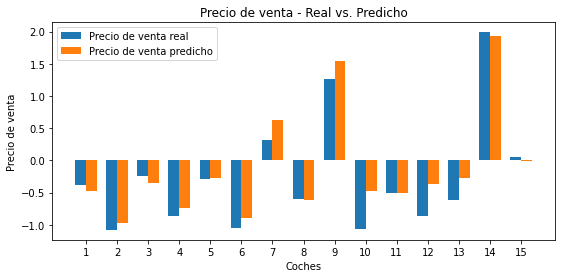

In [51]:
# representando las predicciones para los datos de prueba de los
# 15 primeros coches

import matplotlib.pyplot as plt
import numpy as np

ind = np.arange(15)
width = 0.35

plt.figure(figsize = (9, 4))
plt.bar(ind, y_test[:15], width, label = 'Precio de venta real')
plt.bar(ind+width, y_pred[:15], width, label = 'Precio de venta predicho')

plt.xticks(ind+width / 2, np.arange(1, 16))
plt.legend(loc = 'best')

plt.xlabel('Coches')
plt.ylabel('Precio de venta')
plt.title('Precio de venta - Real vs. Predicho')

plt.show()

# Modelo basado en una red neuronal

In [52]:
# implementa una red neuronal para realizar las mismas predicciones

In [53]:
!pip install keras tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras

In [55]:
print(X_train, y_train)
print('___________________')
print(X_val, y_val)
print('___________________')
print(X_test, y_test)

[[ 1.          0.          0.         ... -0.02116495 -0.26672573
  -0.13702983]
 [ 1.          0.          0.         ... -0.22498666 -0.57042509
   0.04577767]
 [ 1.          0.          0.         ... -0.02116495 -0.71334245
  -1.11200315]
 ...
 [ 0.          1.          0.         ...  0.62725203 -0.21313172
  -0.076094  ]
 [ 1.          0.          0.         ... -0.02116495 -0.26672573
  -0.13702983]
 [ 1.          0.          0.         ... -0.61063494  0.48359036
  -0.50264483]] [-0.45543427  0.08874724 -0.99378229  2.33464184  1.13044232 -0.60918847
 -0.53626981  0.7543904  -0.63773091 -0.66043987 -0.72127486 -0.13000873
 -0.79377684 -0.70960787 -0.75919256  0.2802108  -0.17167653 -1.21816341
 -0.77710972 -0.83836139  1.09919147  0.85230974  1.05856536 -0.73356686
 -0.44189224 -0.79502687  2.73881953 -1.05045051  1.36065694  2.59506561
  0.10020588 -0.37084863 -1.08128468  1.56899595 -0.79377684  0.9023111
 -0.72127486 -0.52043605 -0.75419242  0.41583949 -0.48418506  0.6208450

In [56]:
# Aunque ya no sea necesario normalizamos los datos de entrada
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

In [57]:
# Definir el modelo de red neuronal
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

In [58]:
# Compilar el modelo
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(lr=0.001))

In [59]:
# Entrenar el modelo
history = model.fit(X_train_norm, y_train,
                    validation_data=(X_val_norm, y_val),
                    epochs=50,
                    batch_size=32,
                    verbose=1)

Epoch 1/50
4/4 [==============================] - 2s 191ms/step - loss: 1.6299 - val_loss: 1.5668
Epoch 2/50
4/4 [==============================] - 0s 18ms/step - loss: 1.0718 - val_loss: 1.1242
Epoch 3/50
4/4 [==============================] - 0s 17ms/step - loss: 0.7214 - val_loss: 0.8394
Epoch 4/50
4/4 [==============================] - 0s 23ms/step - loss: 0.5075 - val_loss: 0.6768
Epoch 5/50
4/4 [==============================] - 0s 23ms/step - loss: 0.3919 - val_loss: 0.5866
Epoch 6/50
4/4 [==============================] - 0s 26ms/step - loss: 0.3070 - val_loss: 0.5435
Epoch 7/50
4/4 [==============================] - 0s 23ms/step - loss: 0.2541 - val_loss: 0.5119
Epoch 8/50
4/4 [==============================] - 0s 20ms/step - loss: 0.2112 - val_loss: 0.4913
Epoch 9/50
4/4 [==============================] - 0s 25ms/step - loss: 0.1733 - val_loss: 0.4784
Epoch 10/50
4/4 [==============================] - 0s 25ms/step - loss: 0.1472 - val_loss: 0.4667
Epoch 11/50
4/4 [===========

In [60]:
# Evaluar el modelo en los datos de prueba
test_loss = model.evaluate(X_test_norm, y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.3979


In [61]:
# Hacer predicciones con el modelo entrenado
y_pred = model.predict(X_test_norm)

2/2 [==============================] - 0s 9ms/step


In [62]:
# Visualizar el rendimiento del modelo
import matplotlib.pyplot as plt

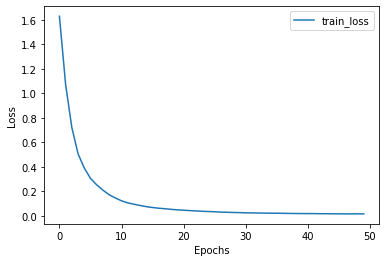

In [63]:
plt.plot(history.history['loss'], label='train_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()